Loan Delinquency Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
test_data = pd.read_csv("C:/Python/IndiaML/data/test.csv")
train_data = pd.read_csv("C:/Python/IndiaML/data/train.csv")

In [3]:
train_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
train_data.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


No empty values. Looks like no outliers too

In [5]:
print(test_data.shape)
print(train_data.shape)

(35866, 28)
(116058, 29)


In [6]:
train_data.isnull().sum()
test_data.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
dtype: int64

In [7]:
#Finding the distribution between the 2 classes
print(train_data.m13.value_counts())

0    115422
1       636
Name: m13, dtype: int64


the given data is a highly inbalanced data, with more training examples for 0 - non-delinquent than 1-delinquent. only .54% samples are for delinquent

In [8]:
y_train_labels = train_data['m13']

In [9]:
#Merge train and test data and dropping loan_id
data = train_data.append([test_data],sort=True)
data  = data.drop(['loan_id','m13'],axis=1)

In [10]:
print(data.shape)

(151924, 27)


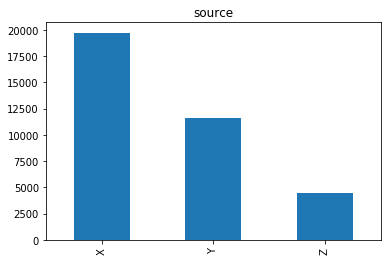

In [11]:
#Visualize Categorical Variables
test_data['source'].value_counts().plot.bar(title='source')

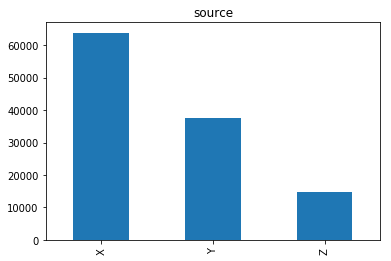

In [12]:
train_data['source'].value_counts().plot.bar(title='source')

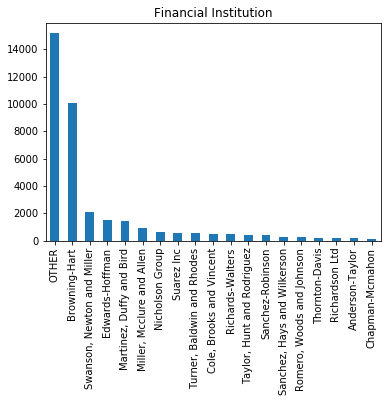

In [13]:
test_data['financial_institution'].value_counts().plot.bar(title='Financial Institution')

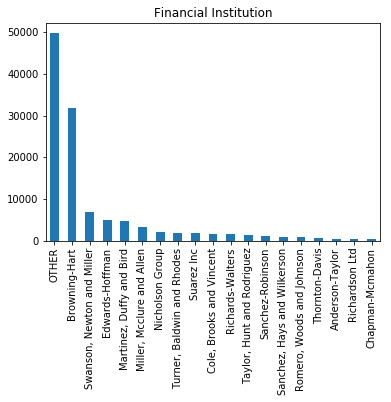

In [14]:
train_data['financial_institution'].value_counts().plot.bar(title='Financial Institution')

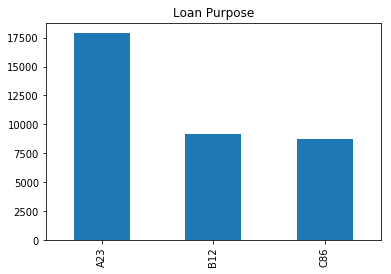

In [15]:
test_data['loan_purpose'].value_counts().plot.bar(title='Loan Purpose')

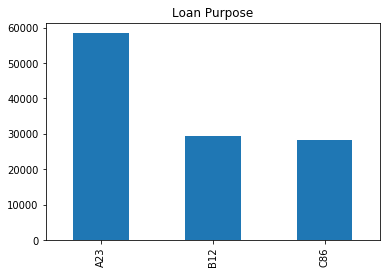

In [16]:
train_data['loan_purpose'].value_counts().plot.bar(title='Loan Purpose')

Distribution of the categorical data source,financial_institution, loan_purpose seems to be fine between the train and test data

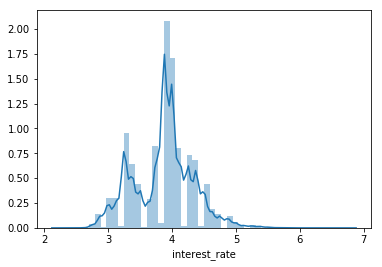

In [17]:
sns.distplot(data['interest_rate'])

interest_rate is normally distributed

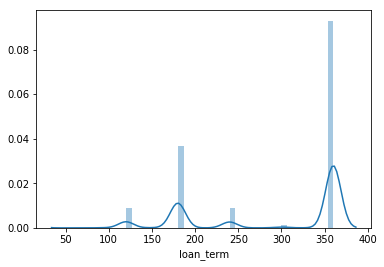

In [18]:
sns.distplot(data['loan_term'])

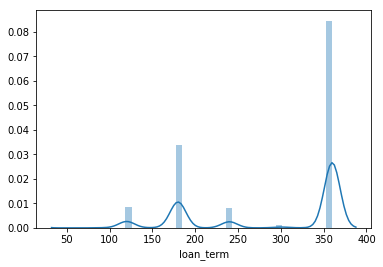

In [19]:
sns.distplot(train_data['loan_term'])

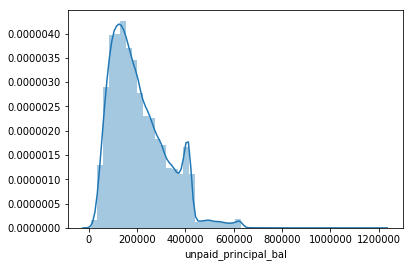

In [20]:
sns.distplot(train_data['unpaid_principal_bal'])

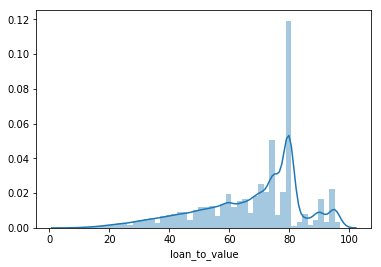

In [21]:
#loan_to_value
sns.distplot(train_data['loan_to_value'])

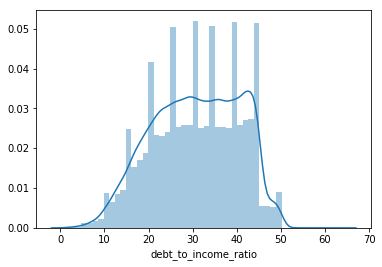

In [22]:
#debt_to_income_ratio
sns.distplot(train_data['debt_to_income_ratio'])

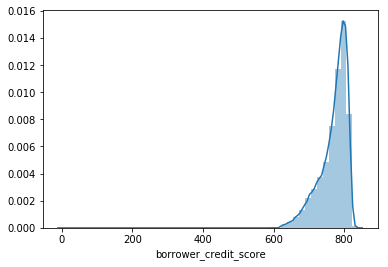

In [23]:
#borrower_credit_score
sns.distplot(train_data['borrower_credit_score'])

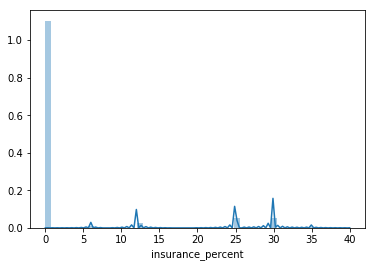

In [24]:
#insurance_percent
sns.distplot(train_data['insurance_percent'])

lot of borrowers have no insurance coverage for their loans

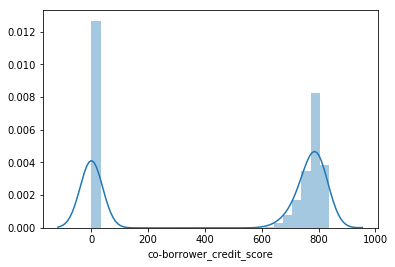

In [25]:
#co-borrower_credit_score    
sns.distplot(train_data['co-borrower_credit_score'])

a lot of co-borrowers have 0 credit score and the next peak is similar to borrower credir score

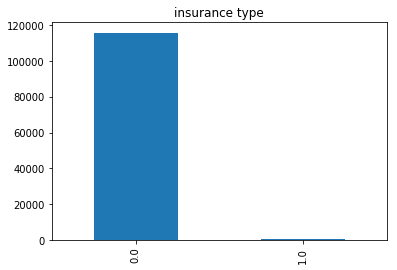

In [26]:
#insurance_type
train_data['insurance_type'].value_counts().plot.bar(title='insurance type')

Almost for all loans the premium is paid by the borrower

Hypothesis 1) Borrowers with high credit score are non-delinquents 2) Borrowers + Co-Borrowers with high credit score are non-delinquents 3) If the interest rates are high there is a possibility that the borrower could be a delinquent 4) If the debt_to_income_ratio is high there is a possibility that the borrower could be a delinquent 5) if the loan_to_value_ratio is low there is a possibilty that the borrower could be a delinquent 6) if any values between m1 to m12 is 1 then the borrower could be a delinquent

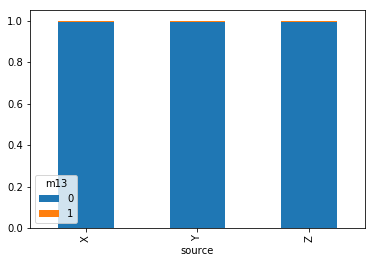

In [27]:
#source vs m13
source = pd.crosstab(train_data['source'],train_data['m13'])
source.div(source.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)

Source is not an influencer of delinquency

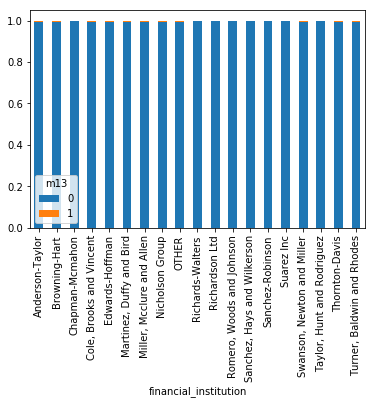

In [28]:
#financial institution vs m13
finst = pd.crosstab(train_data['financial_institution'],train_data['m13'])
finst.div(finst.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)

Financial institution is not an influencer of delinquency

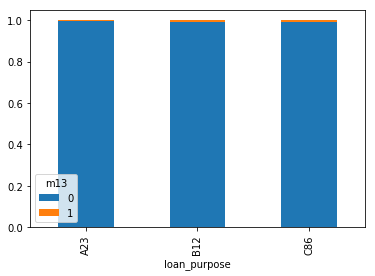

In [29]:
#loan_purpose vs m13
loan_pur = pd.crosstab(train_data['loan_purpose'],train_data['m13'])
loan_pur.div(loan_pur.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)

loan_purpose is not an influencer of delinquency

In [30]:
#number_of_borrowers
train_data.groupby('m13')['number_of_borrowers'].value_counts()

m13  number_of_borrowers
0    2.0                    68635
     1.0                    46787
1    1.0                      427
     2.0                      209
Name: number_of_borrowers, dtype: int64

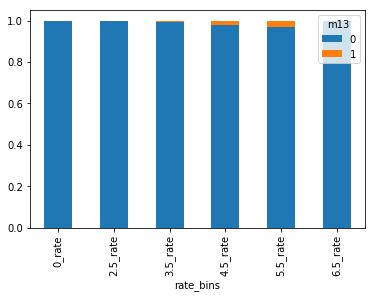

In [31]:
rate_bins=[0,2.5,3.5,4.5,5.5,6.5,7.5]
train_data['rate_bins'] = pd.cut(train_data['interest_rate'],rate_bins,labels=['0_rate','2.5_rate','3.5_rate','4.5_rate','5.5_rate','6.5_rate'])
rate = pd.crosstab(train_data['rate_bins'],train_data['m13'])
rate.div(rate.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
test_data['rate_bins'] = pd.cut(test_data['interest_rate'],rate_bins,labels=['0_rate','2.5_rate','3.5_rate','4.5_rate','5.5_rate','6.5_rate'])

Higher the rate, there are more delinquents

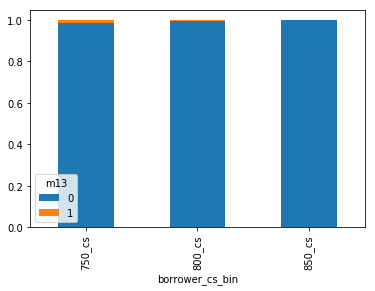

In [32]:
borrower_cs_bin = [0,750,800,850]
train_data['borrower_cs_bin'] = pd.cut(train_data['borrower_credit_score'],borrower_cs_bin,labels=['750_cs','800_cs','850_cs'])
borrower_cs = pd.crosstab(train_data['borrower_cs_bin'],train_data['m13'])
borrower_cs.div(borrower_cs.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
test_data['borrower_cs_bin'] = pd.cut(test_data['borrower_credit_score'],borrower_cs_bin,labels=['750_cs','800_cs','850_cs'])

Higher credit score means they are non-delinquent

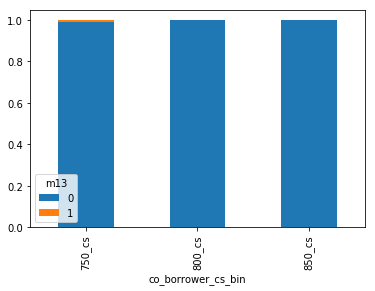

In [33]:
co_borrower_cs_bin = [0,750,800,850]
train_data['co_borrower_cs_bin'] = pd.cut(train_data['co-borrower_credit_score'],co_borrower_cs_bin,labels=['750_cs','800_cs','850_cs'])
co_borrower_cs = pd.crosstab(train_data['co_borrower_cs_bin'],train_data['m13'])
co_borrower_cs.div(co_borrower_cs.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
test_data['co_borrower_cs_bin'] = pd.cut(test_data['co-borrower_credit_score'],co_borrower_cs_bin,labels=['750_cs','800_cs','850_cs'])

Higher credit score of co-borrower chances of non-delinquency is more

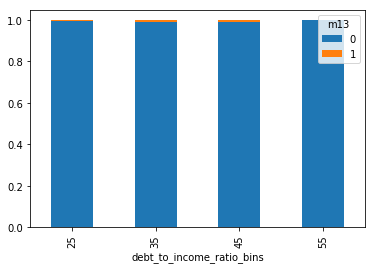

In [34]:
debt_to_income_ratio_bins=[25,35,45,55,65]
train_data['debt_to_income_ratio_bins'] = pd.cut(train_data['debt_to_income_ratio'],debt_to_income_ratio_bins,labels=['25','35','45','55'])
debt_income = pd.crosstab(train_data['debt_to_income_ratio_bins'],train_data['m13'])
debt_income.div(debt_income.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
test_data['debt_to_income_ratio_bins'] = pd.cut(test_data['debt_to_income_ratio'],debt_to_income_ratio_bins,labels=['25','35','45','55'])

higher the debt_to_income ratio more the delinquency

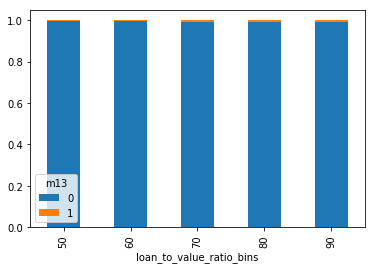

In [35]:
loan_to_value_ratio_bins=[50,60,70,80,90,100]
train_data['loan_to_value_ratio_bins'] = pd.cut(train_data['loan_to_value'],loan_to_value_ratio_bins,labels=['50','60','70','80','90'])
loan_value = pd.crosstab(train_data['loan_to_value_ratio_bins'],train_data['m13'])
loan_value.div(loan_value.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
test_data['loan_to_value_ratio_bins'] = pd.cut(test_data['loan_to_value'],loan_to_value_ratio_bins,labels=['50','60','70','80','90'])

Higher the loan_to_value higher the delinquency

In [36]:
train_data= train_data.drop(['rate_bins','borrower_cs_bin','co_borrower_cs_bin','debt_to_income_ratio_bins','loan_to_value_ratio_bins'],axis=1)



In [37]:
test_data= test_data.drop(['rate_bins','borrower_cs_bin','co_borrower_cs_bin','debt_to_income_ratio_bins','loan_to_value_ratio_bins'],axis=1)

In [38]:
train = train_data.drop(['loan_id','m13'],axis=1)
test = test_data.drop(['loan_id'],axis=1)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 27 columns):
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                          116058 non-null int64
m3                  

In [40]:
#Combine credit score as one value
train['total_credit_score'] = train_data['borrower_credit_score'] + train_data['co-borrower_credit_score']

In [41]:
train.drop(['borrower_credit_score','co-borrower_credit_score'],axis=1,inplace=True)


In [42]:
test['total_credit_score'] = test_data['borrower_credit_score'] + test_data['co-borrower_credit_score']
test.drop(['borrower_credit_score','co-borrower_credit_score'],axis=1,inplace=True)

In [43]:
#Convert Categorical variables
#Using Label encoder for financial institutions, one hot encoding for source,loan purpose

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['financial_institution'] = le.fit_transform(train['financial_institution'])

In [45]:
train.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,total_credit_score
0,Z,18,4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,...,0,0,0,1,0,0,0,0,0,694.0
1,Y,15,4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,...,0,0,0,0,0,0,0,1,0,697.0
2,Z,17,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,...,0,0,0,0,0,0,0,0,0,780.0
3,X,8,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,...,0,0,0,0,0,1,1,1,1,1271.0
4,X,8,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,...,3,4,5,6,7,8,9,10,11,681.0


In [46]:
test['financial_institution'] = le.fit_transform(test['financial_institution'])

In [47]:
source_ohe = pd.get_dummies(train['source'])

In [48]:
train = pd.concat([train,source_ohe],axis=1)

In [49]:
source_ohe_test = pd.get_dummies(test['source'])
test = pd.concat([test,source_ohe_test],axis=1)

In [50]:
loanP = pd.get_dummies(train['loan_purpose'])
train = pd.concat([train,loanP],axis=1)

In [51]:
loanP_test = pd.get_dummies(test['loan_purpose'])
test = pd.concat([test,loanP_test],axis=1)

In [52]:
train.drop(['source','loan_purpose'],axis=1,inplace=True)
test.drop(['source','loan_purpose'],axis=1,inplace=True)

In [53]:
#Time Being will drop date and then come back to work on it
train.drop(['origination_date','first_payment_date'],axis=1,inplace=True)
test.drop(['origination_date','first_payment_date'],axis=1,inplace=True)

In [54]:
#Using RandomForestClassifier as it has inbuilt capabilities to handle unbalnced data

In [55]:
from sklearn.ensemble import RandomForestClassifier
#Since the data set is unbalanced need to use stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score

In [56]:
model = RandomForestClassifier(n_estimators=100,criterion='entropy',class_weight="balanced")
sss = StratifiedShuffleSplit(n_splits=10)
f1_scores = []
i=0
for train_index, val_index in sss.split(train, y_train_labels):
    i=i+1
    print(i)
    print(train_index,val_index)
    #print(train.iloc[train_index])
    x_train, x_val = train.iloc[train_index], train.iloc[val_index]
    #x_train, x_val = train_new[train_index], train_new[val_index]
    y_train, y_val = y_train_labels.iloc[train_index], y_train_labels.iloc[val_index]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    f1_scores.append(f1_score(y_val, y_pred))

print('F1-score', np.mean(f1_scores))
#pred_test = model.predict(test)
# pred_test = model.predict(test)

# submission = pd.DataFrame({
#             "loan_id": test_data['loan_id'],
#             "m13": pred_test
#         })
# submission.to_csv('C:/Python/IndiaML/data/submission.csv', index=False)

1
[92715 64343 78977 ... 92604 78973  6589] [36170 15484 99176 ... 56551 48319 44917]
2
[65558 89988 91413 ... 62745 55359 32620] [14456 10711 86044 ... 49081 44397 17115]
3
[ 72569  74578 104748 ...  27942  53815  74256] [112805  29230  40252 ...  21125  72319  91318]
4
[ 80913  22241  20428 ... 105211  97730  76796] [68124 36035 29541 ... 15717 86031  4027]
5
[ 38991  19765  18048 ... 103482  85356  73107] [34205 84264 12252 ... 96958 93321 65001]
6
[53418 97133 55094 ... 10352 37543 25911] [108726  49872  74313 ...  44817  49648  32721]
7
[37338 38093 92941 ... 92803  1525 82114] [ 2046  1000 16989 ... 53937 66169 15187]
8
[ 26861 103454 102537 ...  49098 114618   2328] [ 75661  25674  64277 ...  20557  45143 108290]
9
[112235  13340 105391 ...  54036  41932  62719] [113567  29194  53460 ...  88802  69037  89079]
10
[111066  30621  97145 ...  98190 100619  55566] [ 69860  91122 116056 ...  14773  63342  37395]
F1-score 0.45693067155196204


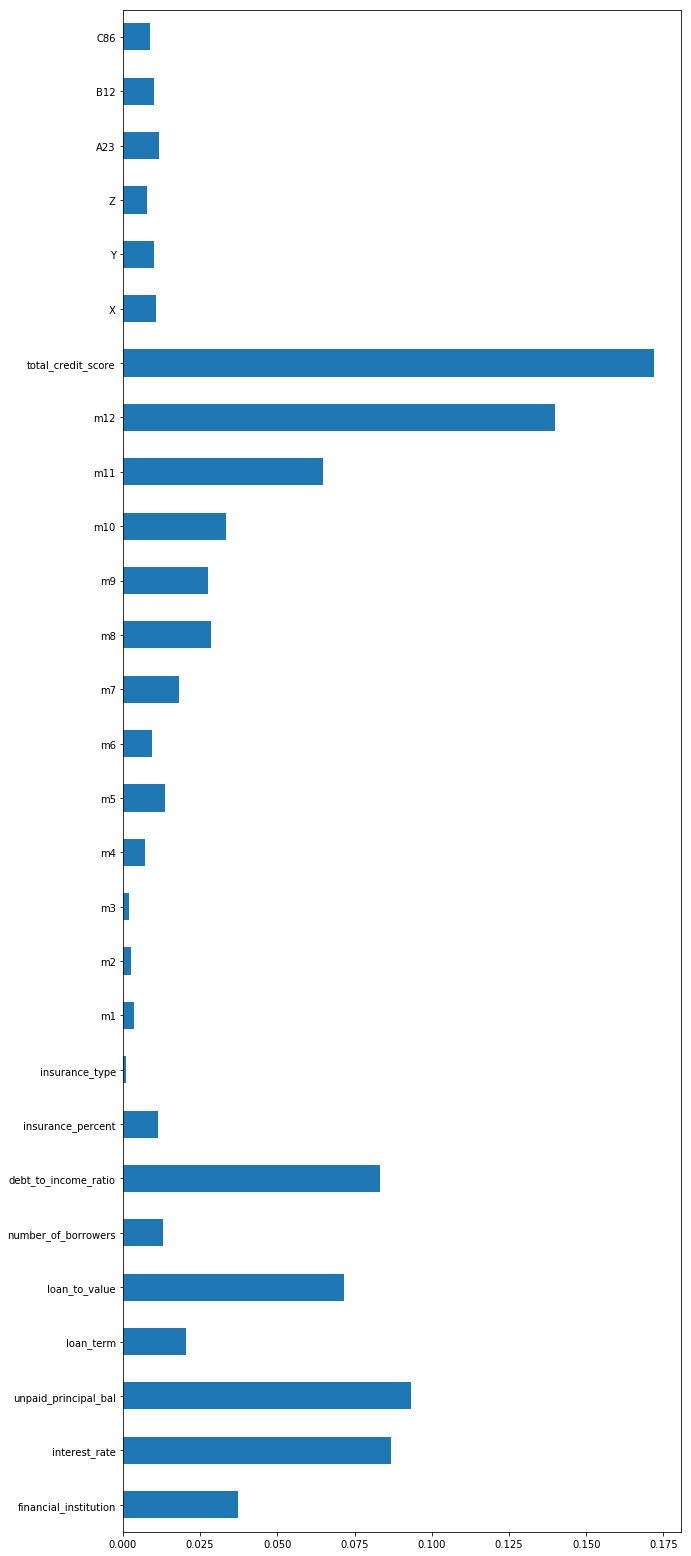

In [57]:
importances = pd.Series(model.feature_importances_,index=train.columns)
importances.plot(kind='barh',figsize=(10,28))

In [58]:
#Using different sampling techniques to balance the classes


In [59]:
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 

Using TensorFlow backend.


Random Undersampling aims to balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out.

In [60]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict

In [61]:
# Build model with undersampling

pipe_undersample = imb_make_pipeline(RobustScaler(),RandomUnderSampler(), model)
scores = cross_val_score(pipe_undersample,
                         train, y_train_labels,
                         scoring="f1", cv=10)
print(scores.mean())

0.07448303920425074


Random Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

In [62]:
# Build model with oversampling
pipe_oversample = imb_make_pipeline(RobustScaler(),RandomOverSampler(), model)
scores = cross_val_score(pipe_oversample,
                         train, y_train_labels,
                         scoring="f1", cv=10)
print(scores.mean())

0.49192498619205904


Synthetic Minority Over-sampling Technique

In [63]:
# Build model with SMOTE

pipe_smote = imb_make_pipeline(RobustScaler(),SMOTE(), model)
scores = cross_val_score(pipe_smote,
                         train, y_train_labels,
                         scoring="f1", cv=10)
print(scores.mean())

0.4844657003837252


In [64]:
# Build model with ADASYN (Adaptive Synthetic Sampling)

pipe_adasyn = imb_make_pipeline(RobustScaler(),ADASYN(), model)
scores = cross_val_score(pipe_adasyn,
                         train, y_train_labels,
                         scoring="f1", cv=10)
print(scores.mean())

0.48799947810804606


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 28 columns):
financial_institution    116058 non-null int32
interest_rate            116058 non-null float64
unpaid_principal_bal     116058 non-null int64
loan_term                116058 non-null int64
loan_to_value            116058 non-null int64
number_of_borrowers      116058 non-null float64
debt_to_income_ratio     116058 non-null float64
insurance_percent        116058 non-null float64
insurance_type           116058 non-null float64
m1                       116058 non-null int64
m2                       116058 non-null int64
m3                       116058 non-null int64
m4                       116058 non-null int64
m5                       116058 non-null int64
m6                       116058 non-null int64
m7                       116058 non-null int64
m8                       116058 non-null int64
m9                       116058 non-null int64
m10                      116058 n

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 28 columns):
financial_institution    35866 non-null int32
interest_rate            35866 non-null float64
unpaid_principal_bal     35866 non-null int64
loan_term                35866 non-null int64
loan_to_value            35866 non-null int64
number_of_borrowers      35866 non-null int64
debt_to_income_ratio     35866 non-null int64
insurance_percent        35866 non-null int64
insurance_type           35866 non-null int64
m1                       35866 non-null int64
m2                       35866 non-null int64
m3                       35866 non-null int64
m4                       35866 non-null int64
m5                       35866 non-null int64
m6                       35866 non-null int64
m7                       35866 non-null int64
m8                       35866 non-null int64
m9                       35866 non-null int64
m10                      35866 non-null int64
m11            

In [67]:
robust_scaler = RobustScaler()
#robust_scaler.fit(train)
X_train = robust_scaler.fit_transform(train)
X_test = robust_scaler.transform(test)

In [68]:
#After choosing the sampling technique will tune the model for higher scores
sampling_model = RandomOverSampler()
X,y = sampling_model.fit_sample(X_train,y_train_labels)
X = pd.DataFrame(X, columns = train.columns)


In [69]:
print(X.shape)

(230844, 28)


In [70]:
y.shape

(230844,)

In [71]:
#model = RandomForestClassifier(random_state=42,max_depth= 10 ,min_samples_split= 5 ,n_estimators= 500,n_jobs=-1, min_samples_leaf=2,  criterion='entropy',class_weight= {0: 0.8, 1:1})
#model.fit(X,y)
model = RandomForestClassifier(random_state=100,n_estimators=200,criterion='entropy',class_weight='balanced')

In [72]:
sss = StratifiedShuffleSplit(n_splits=10)
f1_scores = []
i=0
for train_index, val_index in sss.split(X, y):
    i=i+1
    print(i)
    print(train_index,val_index)
    #print(train.iloc[train_index])
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    #x_train, x_val = train_new[train_index], train_new[val_index]
    #y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    f1_scores.append(f1_score(y_val, y_pred))

print('F1-score', np.mean(f1_scores))

1
[194151 176032 142311 ... 100326 133183 161833] [ 31971 154958 208375 ... 154169 138628 199157]
2
[ 63904 230038 212605 ... 141327 155121 130348] [112622 101113 197439 ...  78154  80194  68726]
3
[158373  93190 190496 ...  22286 174564 157498] [ 87797   8042 186110 ...  70099 206347  89399]
4
[  2420 182165  18631 ... 119774  84142 200344] [ 77674 131743 197437 ...  79663  77050  46044]
5
[131801 135723 100875 ...  49414   4030  73703] [172449  61561 156087 ...  29236 163993 130371]
6
[ 26405 154653 119848 ... 203042 196342 182273] [181293  85227 181348 ... 142064  64428  51687]
7
[163440 208848  82574 ... 151529 208261 200235] [176104  33028 108517 ... 203502 146513  95589]
8
[ 64520  57149 151922 ... 226012 197145  62204] [ 33311 214854 226738 ...  61128 208791 203459]
9
[212816  63880  86622 ... 171445 209864 112738] [209504  51012  51617 ...  78084  32130 190110]
10
[ 30493 224767 171308 ... 104707  41915  68399] [ 28906  33854 199676 ...  55148 119814 149999]
F1-score 0.99953672

In [73]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
pipe_baseline = make_pipeline(RobustScaler(), ada)
scores = cross_val_score(pipe_baseline,
                         train, y_train_labels,
                         scoring="f1", cv=10)

In [74]:
sss = StratifiedShuffleSplit(n_splits=10)
f1_scores = []
i=0
for train_index, val_index in sss.split(X, y):
    i=i+1
    print(i)
    print(train_index,val_index)
    #print(train.iloc[train_index])
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    #x_train, x_val = train_new[train_index], train_new[val_index]
    y_train, y_val = y[train_index], y[val_index]
    ada.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    f1_scores.append(f1_score(y_val, y_pred))

print('F1-score', np.mean(f1_scores))

1
[ 52123  72730 117498 ...  43411  33102  71677] [ 44112 157107 215162 ...   8882  88465   7416]
2
[141739 124103 191968 ... 200512 202489 194331] [157410  34709  88365 ... 166879    493  86828]
3
[219701  96176   2494 ...  12336 129854  77930] [187750  66968 109135 ...   3544   4418 172693]
4
[ 62654  65627 114750 ...  74420 108576 223007] [211908 175848 206181 ... 181767 209042 151097]
5
[ 98666   9799 201556 ... 198253 229849  29911] [141963  73929  87838 ... 219226 106636  32038]
6
[156053 158950 210457 ...  68321 109902 113621] [ 52630  65611 152211 ... 210894 120750 204305]
7
[ 17785 113070  98946 ... 226163 117473 117704] [208655 209193 107745 ...  26085 127286  74599]
8
[204689 191154 224690 ...  70525 200461 177037] [ 53850  77479 102246 ... 173181 179347  72853]
9
[182794  12726 181780 ... 168099 222371 201581] [ 26532  41131 208109 ...  88866 119573  19089]
10
[ 90392 132725 196433 ...  53576 219431 153960] [228922  14407 193860 ...   5498 166139 125921]
F1-score 0.99993936

Both the models are overfitting. Need to Hypertune

In [75]:
#pred_test = model.predict(test)
pred_test = ada.predict(X_test)

submission = pd.DataFrame({
            "loan_id": test_data['loan_id'],
            "m13": pred_test
        })
submission.to_csv('C:/Python/IndiaML/data/submission_ada.csv', index=False)


In [76]:
sum(pred_test)

3598

In [77]:
X_test.shape


(35866, 28)

In [78]:
pd.Series(ada.feature_importances_,index=train.columns).sort_values(ascending=False)

total_credit_score       0.32
interest_rate            0.14
loan_to_value            0.10
financial_institution    0.08
unpaid_principal_bal     0.08
debt_to_income_ratio     0.06
m12                      0.06
m11                      0.04
m8                       0.02
m1                       0.02
m7                       0.02
m5                       0.02
m9                       0.02
m10                      0.02
m6                       0.00
B12                      0.00
m4                       0.00
m3                       0.00
m2                       0.00
insurance_type           0.00
insurance_percent        0.00
X                        0.00
number_of_borrowers      0.00
Y                        0.00
loan_term                0.00
Z                        0.00
A23                      0.00
C86                      0.00
dtype: float64

In [79]:
pd.Series(model.feature_importances_,index=train.columns).sort_values(ascending=False)

total_credit_score       0.173250
m12                      0.138709
unpaid_principal_bal     0.099789
debt_to_income_ratio     0.083492
interest_rate            0.081228
loan_to_value            0.073294
m11                      0.071870
financial_institution    0.040077
m10                      0.033035
m9                       0.033021
m8                       0.024817
loan_term                0.020485
m7                       0.013578
m5                       0.012555
number_of_borrowers      0.012258
insurance_percent        0.010980
A23                      0.010808
B12                      0.010040
X                        0.009983
Y                        0.009897
C86                      0.008616
Z                        0.008041
m6                       0.006574
m4                       0.006447
m1                       0.003254
m2                       0.002160
m3                       0.001051
insurance_type           0.000689
dtype: float64

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=500,num=20)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=2,stop=10,num=1)]
max_depth.append(None)
min_samples_split=[2,4,6,8,10]
min_samples_leaf=[1,2,3,4,5]
bootstrap=[True,False]


In [82]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [83]:
print(random_grid)

{'n_estimators': [100, 121, 142, 163, 184, 205, 226, 247, 268, 289, 310, 331, 352, 373, 394, 415, 436, 457, 478, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, None], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]}


In [84]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=415, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=415, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True, total=  16.8s
[CV] n_estimators=415, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s remaining:    0.0s


[CV]  n_estimators=415, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True, total=  16.8s
[CV] n_estimators=415, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True 
[CV]  n_estimators=415, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=True, total=  16.9s
[CV] n_estimators=331, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=331, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=None, bootstrap=False, total= 1.0min
[CV] n_estimators=331, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=331, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=None, bootstrap=False, total= 1.1min
[CV] n_estimators=331, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=

[CV]  n_estimators=436, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total= 1.5min
[CV] n_estimators=226, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=226, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  30.3s
[CV] n_estimators=226, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=226, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  30.2s
[CV] n_estimators=226, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=226, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  30.3s
[CV] n_estimators=478, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators

[CV]  n_estimators=163, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=True, total=  21.1s
[CV] n_estimators=163, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=163, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=True, total=  21.2s
[CV] n_estimators=163, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=163, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=True, total=  21.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False, total=   4.9s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=2, bootstrap=False 
[CV]  n_estimators=100, mi

[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, total=   8.0s
[CV] n_estimators=163, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 
[CV]  n_estimators=163, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, total=   7.9s
[CV] n_estimators=289, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=289, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, total=  11.7s
[CV] n_estimators=289, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=289, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, total=  11.7s
[CV] n_estimators=289, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimators=289, min_samples_sp

[CV]  n_estimators=436, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total= 1.5min
[CV] n_estimators=247, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=247, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=None, bootstrap=True, total=  31.5s
[CV] n_estimators=247, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=247, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=None, bootstrap=True, total=  31.6s
[CV] n_estimators=247, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=247, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=None, bootstrap=True, total=  31.5s
[CV] n_estimators=500, min_samples_split=8, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 
[CV]  n_estimat

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 87.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=200,
                                                    n_job

In [85]:
rf_random.best_params_

{'n_estimators': 478,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [88]:
model = RandomForestClassifier(random_state=100,n_estimators=478,criterion='entropy',class_weight='balanced',min_samples_split=8,min_samples_leaf= 1,max_features= 'auto',max_depth= None,bootstrap= False)

In [89]:
sss = StratifiedShuffleSplit(n_splits=10)
f1_scores = []
i=0
for train_index, val_index in sss.split(X, y):
    i=i+1
    print(i)
    print(train_index,val_index)
    #print(train.iloc[train_index])
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    #x_train, x_val = train_new[train_index], train_new[val_index]
    #y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    f1_scores.append(f1_score(y_val, y_pred))

print('F1-score', np.mean(f1_scores))

1
[ 56997  47495 225196 ... 149814  73914 161787] [229385  79327   9140 ... 157244  64754  96674]
2
[ 49983 222065 122219 ...  73026  87355 116286] [  9681   3220 134905 ... 149775 100288 211509]
3
[ 66171  29997  72039 ... 103121 154532 223703] [155568  24461 187733 ...  50783 162109 125243]
4
[ 93523  23156  95524 ... 202787 192406 173558] [62812 57967 73367 ... 83509 33335 40853]
5
[ 30116  86632  25328 ...  14663  40686 175093] [137616  58246  62853 ...  30764 107517 168100]
6
[206920 186060 225595 ... 178206  36100 215043] [ 84459  62173  28056 ... 117782 200582  77709]
7
[198635 137729  66048 ... 144851  18947 210668] [194227   6704 161463 ...  75046 212934 177507]
8
[ 35409  46138  29523 ... 222484  76058 178039] [ 97498  98975  52975 ... 115545 112599  22397]
9
[ 20760  88816  59230 ... 134340 189918  54479] [173508 192261 184668 ... 121241 111079 131404]
10
[103672 187386 195920 ... 227717  77249 145725] [178889  65114 148611 ...  57072 135429 163106]
F1-score 0.99970552984634

In [90]:
train_X,valid_X,train_y,valid_y = train_test_split(X,y)

In [91]:
model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=8, min_weight_fraction_leaf=0.0,
                       n_estimators=478, n_jobs=None, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

In [92]:
y_pred = model.predict(valid_X)

In [93]:
print(f1_score(valid_y, y_pred))

0.9995850191928624
